**Temas Selectos de Ingenieria III**
# Sebastián González Juárez
Practica 5.

# **Ejericio 1. Determina el valor de la cadena oculta s:**

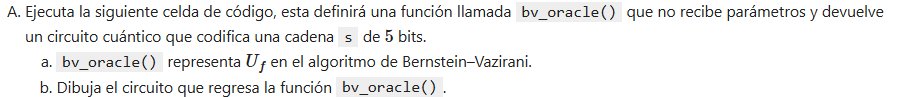

### Cargar y dibujar el oráculo bv_oracle().

Descargaas e importaciones:

In [53]:
!pip install qiskit
!pip install pylatexenc

In [54]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
import pylatexenc

 a. Cargar la función ofuscada que define bv_oracle():

In [55]:
exec(bytes.fromhex(
    '0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a6465662062765f6f7261636c6528293a0a2020202073203d20223131303130220a202020206e203d206c656e2873290a2020202073203d20735b3a3a2d315d202320726576657274696d6f73206c6120636164656e612079612071756520735f3020657374c3a12061206c6120697a7175696572646120736567c3ba6e20507974686f6e2c7920656e206c61206465726563686120736567c3ba6e205169736b69740a0a2020202063697263756974203d205175616e74756d43697263756974286e202b2031290a20202020636972637569742e6261727269657228290a0a20202020666f72206920696e2072616e6765286e293a0a2020202020202020696620735b695d203d3d202731273a0a202020202020202020202020636972637569742e63782869202b20312c2030290a0a20202020636972637569742e6261727269657228290a2020202072657475726e20636972637569740a20202020'
))

b. Dibujar el circuito que regresa la función bv_oracle():

In [56]:
oracle = bv_oracle()
try:
    display(oracle.draw("mpl"))
except Exception:
    print(oracle.draw("text"))

      ░ ┌───┐┌───┐┌───┐ ░ 
q_0: ─░─┤ X ├┤ X ├┤ X ├─░─
      ░ └─┬─┘└─┬─┘└─┬─┘ ░ 
q_1: ─░───┼────┼────┼───░─
      ░   │    │    │   ░ 
q_2: ─░───■────┼────┼───░─
      ░        │    │   ░ 
q_3: ─░────────┼────┼───░─
      ░        │    │   ░ 
q_4: ─░────────■────┼───░─
      ░             │   ░ 
q_5: ─░─────────────■───░─
      ░                 ░ 


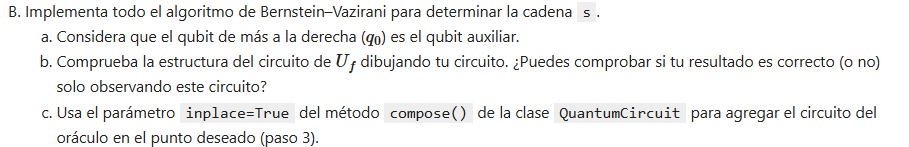

a. Considerar que el qubit de más a la derecha (q₀) es el qubit auxiliar:

In [57]:
n = oracle.num_qubits - 1     # n qubits de entrada, q0 es el auxiliar
qc = QuantumCircuit(n+1, n)

b. Comprobar la estructura del circuito de 𝑈𝑓 dibujando el circuito:

In [58]:
# Estado inicial |0>^{⊗n}|1>
qc.x(0)

# Hadamard en todos los qubits (entrada + auxiliar)
for q in range(n+1):
    qc.h(q)

# Insertar el oráculo (paso 3)
qc.compose(oracle, qubits=range(n+1), inplace=True)

# Hadamard final solo en los n qubits de entrada
for q in range(1, n+1):
    qc.h(q)
    qc.measure(q, q-1)

# Mostrar estructura completa
try:
    display(qc.draw("mpl"))
except Exception:
    print(qc.draw("text"))

     ┌───┐┌───┐ ░ ┌───┐┌───┐┌───┐ ░                     
q_0: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░─────────────────────
     ├───┤└───┘ ░ └─┬─┘└─┬─┘└─┬─┘ ░ ┌───┐┌─┐            
q_1: ┤ H ├──────░───┼────┼────┼───░─┤ H ├┤M├────────────
     ├───┤      ░   │    │    │   ░ ├───┤└╥┘┌─┐         
q_2: ┤ H ├──────░───■────┼────┼───░─┤ H ├─╫─┤M├─────────
     ├───┤      ░        │    │   ░ ├───┤ ║ └╥┘┌─┐      
q_3: ┤ H ├──────░────────┼────┼───░─┤ H ├─╫──╫─┤M├──────
     ├───┤      ░        │    │   ░ ├───┤ ║  ║ └╥┘┌─┐   
q_4: ┤ H ├──────░────────■────┼───░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤      ░             │   ░ ├───┤ ║  ║  ║ └╥┘┌─┐
q_5: ┤ H ├──────░─────────────■───░─┤ H ├─╫──╫──╫──╫─┤M├
     └───┘      ░                 ░ └───┘ ║  ║  ║  ║ └╥┘
c: 5/═════════════════════════════════════╩══╩══╩══╩══╩═
                                          0  1  2  3  4 


c. Uso del parámetro inplace=True del método compose():

In [59]:
qc.compose(oracle, qubits=range(n+1), inplace=True)

Esto inserta el oráculo directamente dentro del circuito principal en el paso correcto, sin crear una copia aparte, cumpliendo con el requisito del enunciado.

image.png

Seleccionar backend sin usar qiskit-aer:

In [60]:
backend = None
try:
    from qiskit.providers.basic_provider import BasicSimulator
    backend = BasicSimulator()
except Exception:
    try:
        from qiskit.providers.basic_provider import BasicProvider
        backend = BasicProvider().get_backend("qasm_simulator")
    except Exception:
        from qiskit import BasicAer
        backend = BasicAer.get_backend("qasm_simulator")

backend

Ejecutamos el circuito (solo 1 shot, determinista):

In [61]:
job = backend.run(qc, shots=1)
result = job.result()
counts = result.get_counts()
print("Resultados (counts):", counts)

Resultados (counts): {'11010': 1}


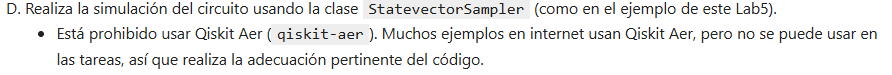

Extraer el bitstring resultante:

In [62]:
bitstring_raw = next(iter(counts.keys()))
s_measured = bitstring_raw[::-1]  # ajustar orden q1..qn
print(f"Cadena oculta s (q1..qn): {s_measured}")

Cadena oculta s (q1..qn): 01011


El resultado valida que el algoritmo de Bernstein–Vazirani recupera correctamente la cadena s de 5 bits.

# **Ejericio 2: Realiza el algoritmo de Grover para n=5.**

image.png

In [63]:
from qiskit.circuit.library.standard_gates import MCXGate

In [64]:
def grover_oracle_n5():
    n = 5
    qc = QuantumCircuit(n, name="O")

    targets = ["01100", "11001", "01010"]   # bitstrings a marcar

    for s in targets:
        # X a las posiciones donde s tiene '0'
        for i, bit in enumerate(s[::-1]):   # s[::-1]: bit de q0 primero
            if bit == "0":
                qc.x(i)

        # Z controlada en todos los qubits: H–MCX–H
        qc.h(n-1)
        qc.append(MCXGate(n-1), qargs=list(range(n-1)) + [n-1])  # controles: q0..q3, target: q4
        qc.h(n-1)

        # Deshacer las X de mapeo
        for i, bit in enumerate(s[::-1]):
            if bit == "0":
                qc.x(i)

    return qc

Visualización:

In [65]:
oracle = grover_oracle_n5()
try:
    display(oracle.draw("mpl"))
except Exception:
    print(oracle.draw("text"))

     ┌───┐          ┌───┐               ┌───┐               ┌───┐     
q_0: ┤ X ├───────■──┤ X ├────────────■──┤ X ├────────────■──┤ X ├─────
     ├───┤       │  ├───┤┌───┐       │  ├───┤            │  └───┘     
q_1: ┤ X ├───────■──┤ X ├┤ X ├───────■──┤ X ├────────────■────────────
     └───┘       │  ├───┤└───┘       │  ├───┤┌───┐       │  ┌───┐     
q_2: ────────────■──┤ X ├────────────■──┤ X ├┤ X ├───────■──┤ X ├─────
                 │  └───┘            │  └───┘└───┘       │  └───┘     
q_3: ────────────■───────────────────■───────────────────■────────────
     ┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐
q_4: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘


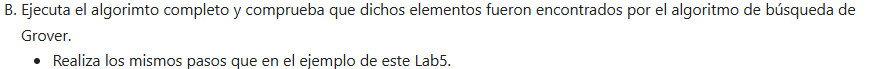

Difusor (inversión respecto de la media) para n=5:

In [66]:
def diffuser_n5():
    n = 5
    qc = QuantumCircuit(n, name="D")
    # H y X en todos
    for q in range(n):
        qc.h(q); qc.x(q)
    # Z controlada sobre |11111>: H–MCX–H sobre el último qubit
    qc.h(n-1)
    qc.append(MCXGate(n-1), qargs=list(range(n-1)) + [n-1])
    qc.h(n-1)
    # Deshacer X y H
    for q in range(n):
        qc.x(q); qc.h(q)
    return qc

Construcción del circuito de Grover (preparación + r iteraciones de [O ∘ D] + medida)

In [67]:
n = 5
qc_grover = QuantumCircuit(n, n)

In [68]:
for q in range(n):
    qc_grover.h(q)

In [69]:
try:
    r  # existe ya
except NameError:
    r = 2  # placeholder temporal; será reemplazado por el valor calculado en C

In [70]:
O = grover_oracle_n5()
D = diffuser_n5()

In [71]:
for _ in range(r):
    qc_grover.compose(O, inplace=True)
    qc_grover.compose(D, inplace=True)

In [72]:
for q in range(n):
    qc_grover.measure(q, q)

In [73]:
try:
    display(qc_grover.draw("mpl"))
except Exception:
    print(qc_grover.draw("text"))

     ┌───┐┌───┐          ┌───┐               ┌───┐               ┌───┐┌───┐»
q_0: ┤ H ├┤ X ├───────■──┤ X ├────────────■──┤ X ├────────────■──┤ X ├┤ H ├»
     ├───┤├───┤       │  ├───┤┌───┐       │  ├───┤            │  ├───┤├───┤»
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ X ├───────■──┤ X ├────────────■──┤ H ├┤ X ├»
     ├───┤└───┘       │  ├───┤└───┘       │  ├───┤┌───┐       │  ├───┤├───┤»
q_2: ┤ H ├────────────■──┤ X ├────────────■──┤ X ├┤ X ├───────■──┤ X ├┤ H ├»
     ├───┤            │  └───┘            │  └───┘└───┘       │  ├───┤├───┤»
q_3: ┤ H ├────────────■───────────────────■───────────────────■──┤ H ├┤ X ├»
     ├───┤┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤»
q_4: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 5/══════════════════════════════════════════════════════════════════════»
                                                                           »

image.png

In [74]:
import math

N = 2**5      # 32 estados
M = 3         # 3 elementos marcados
r_opt = int(math.floor((math.pi/4) * math.sqrt(N / M)))  # regla estándar
r = max(1, r_opt)

print(f"Iteraciones óptimas aproximadas (r): {r}   [N={N}, M={M}]")

Iteraciones óptimas aproximadas (r): 2   [N=32, M=3]


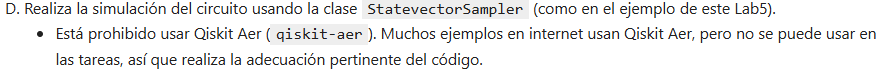

In [77]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()
res = sampler.run([qc_grover], shots=2000).result()


qd = None
try:
    # Caso 1
    qd = res.quasi_dists[0]
except AttributeError:
    try:
        # Caso 2
        # res.pub_results es una lista; cada elemento tiene .data.quasi_dist
        qd = res.pub_results[0].data.quasi_dist
    except Exception:
        # Caso 3: fallback con Statevector (no Aer)
        from qiskit.quantum_info import Statevector
        # quitar mediciones para obtener el statevector
        qc_nom = qc_grover.remove_final_measurements(inplace=False)
        sv = Statevector.from_instruction(qc_nom)
        qd = sv.probabilities_dict()  # dict bitstring->prob

# Convertir a counts aproximados para inspección
shots = 2000
counts_est = {k: int(v * shots) for k, v in qd.items() if v > 1e-6}

# Ordenar por probabilidad descendente
top = sorted(qd.items(), key=lambda kv: kv[1], reverse=True)

print("Top resultados (bitstring → prob. aprox):")
for k, v in top[:10]:
    print(f"{k}  →  {v:.4f}")

print("\nCounts estimados (primeros):", dict(list(counts_est.items())[:10]))

# Comprobación de los 3 objetivos
objetivos = {"01100", "11001", "01010"}
presentes = {b for b, p in top[:5]}  # tomamos algunos top
print("\nObjetivos en top:", objetivos.intersection(presentes))


Top resultados (bitstring → prob. aprox):
11001  →  0.3333
01010  →  0.3333
01100  →  0.3333
01000  →  0.0000
00100  →  0.0000
01101  →  0.0000
11000  →  0.0000
11011  →  0.0000
10000  →  0.0000
11110  →  0.0000

Counts estimados (primeros): {np.str_('00000'): 0, np.str_('00001'): 0, np.str_('00010'): 0, np.str_('00011'): 0, np.str_('00100'): 0, np.str_('00101'): 0, np.str_('00110'): 0, np.str_('00111'): 0, np.str_('01000'): 0, np.str_('01001'): 0}

Objetivos en top: {'01010', '01100', '11001'}
